## Scratchpad

read a spotify playlist and parse that

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from pathlib import Path
import json
import pandas as pd

creadentials = Path("spotify_credentials.json")
if not creadentials.exists():
    raise FileNotFoundError("Spotify credentials file not found. Please create 'spotify_credentials.json' with your Spotify API credentials.")
creds = json.loads(creadentials.read_text())

CLIENT_ID = creds.get("CLIENT_ID")
CLIENT_SECRET = creds.get("CLIENT_SECRET")
if not CLIENT_ID or not CLIENT_SECRET:
    raise ValueError("CLIENT_ID and CLIENT_SECRET must be provided in 'spotify_credentials.json'.")



In [2]:
# Set up client credentials
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Your playlist link or ID
playlist_url = 'https://open.spotify.com/playlist/294v6cT4ZWxtpsKQPZyC5h'

# Extract playlist ID from URL
playlist_id = playlist_url.split("/")[-1].split("?")[0]

# Get playlist items
results = sp.playlist_items(playlist_id, additional_types=['track'])

tracks_data = []

for item in results['items']:
    track = item['track']
    if track:
        print(track.keys())
        title = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album = track['album']['name']
        release_date = track['album']['release_date']
        duration_ms = track['duration_ms']
        duration_min = round(duration_ms / 60000, 2)
        link = track['external_urls']['spotify']

        track_info = {
            'title': title,
            'artist': artists,
            'album': album,
            'release_date': release_date,
            'length_min': duration_min,
            'spotify_link': link
        }
        tracks_data.append(track_info)



dict_keys(['preview_url', 'available_markets', 'explicit', 'type', 'episode', 'track', 'album', 'artists', 'disc_number', 'track_number', 'duration_ms', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'uri', 'is_local'])
dict_keys(['preview_url', 'available_markets', 'explicit', 'type', 'episode', 'track', 'album', 'artists', 'disc_number', 'track_number', 'duration_ms', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'uri', 'is_local'])
dict_keys(['preview_url', 'available_markets', 'explicit', 'type', 'episode', 'track', 'album', 'artists', 'disc_number', 'track_number', 'duration_ms', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'uri', 'is_local'])
dict_keys(['preview_url', 'available_markets', 'explicit', 'type', 'episode', 'track', 'album', 'artists', 'disc_number', 'track_number', 'duration_ms', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'uri', 'is_local'])
dict_keys(['preview_url', 'avail

In [3]:
tracks_data = []

for item in results['items']:
    track = item['track']
    if track:
        title = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album = track['album']['name']
        release_date = track['album']['release_date']
        duration_ms = track['duration_ms']
        duration_min = round(duration_ms / 60000, 2)
        link = track['external_urls']['spotify']
        track_id = track['id']
        popularity = track.get('popularity')
        explicit = track.get('explicit')
        preview_url = track.get('preview_url')
        track_number = track.get('track_number')
        disc_number = track.get('disc_number')
        available_markets = track.get('available_markets')
        is_local = track.get('is_local')
        external_ids = track.get('external_ids')
        uri = track.get('uri')
        album_images = track['album'].get('images')
        album_type = track['album'].get('album_type')
        album_release_date_precision = track['album'].get('release_date_precision')
        album_total_tracks = track['album'].get('total_tracks')
        album_id = track['album'].get('id')
        album_uri = track['album'].get('uri')
        # Künstler-Objekte mit mehr Infos
        artists_full = track.get('artists')

        track_info = {
            'title': title,
            'artist': artists,
            'album': album,
            'release_date': release_date,
            'length_min': duration_min,
            'spotify_link': link,
            'track_id': track_id,
            'popularity': popularity,
            'explicit': explicit,
            'preview_url': preview_url,
            'track_number': track_number,
            'disc_number': disc_number,
            'available_markets': available_markets,
            'is_local': is_local,
            'external_ids': external_ids,
            'uri': uri,
            'album_images': album_images,
            'album_type': album_type,
            'album_release_date_precision': album_release_date_precision,
            'album_total_tracks': album_total_tracks,
            'album_id': album_id,
            'album_uri': album_uri,
            'artists_full': artists_full
        }
        tracks_data.append(track_info)


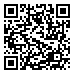
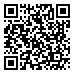
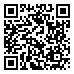
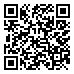
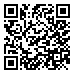
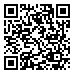
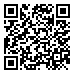
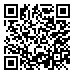
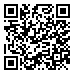
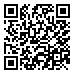
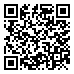
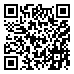
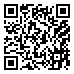
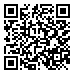
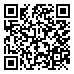
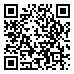
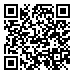
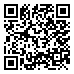
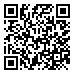
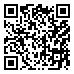
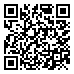
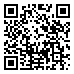
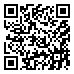
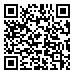
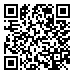
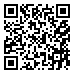
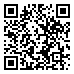
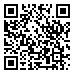
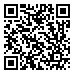
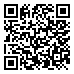
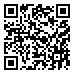
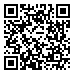
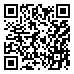
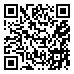
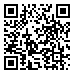
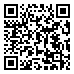
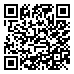
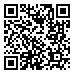
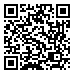
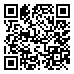
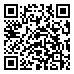
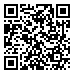
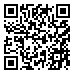
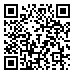
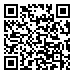
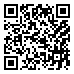
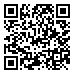
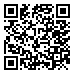
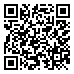
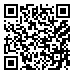
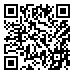
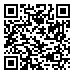
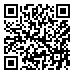
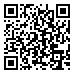
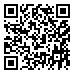
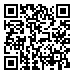
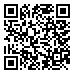
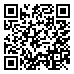
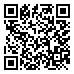

In [18]:
from IPython.display import display, HTML
import re
import qrcode
import base64
from io import BytesIO

def extract_track_id(spotify_link):
    match = re.search(r"track/([a-zA-Z0-9]+)", spotify_link)
    if match:
        return match.group(1)
    return None

def bool_icon(val):
    return "✅" if val else "❌"

def generate_qr_code_base64(url):
    qr = qrcode.QRCode(box_size=2, border=2)
    qr.add_data(url)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode()
    return f'<div style="margin-top:8px;"><strong>QR für Preview:</strong><br><img src="data:image/png;base64,{img_str}" alt="QR Code" style="margin-top:4px;"/></div>'

html_cards = ""
for track in tracks_data:
    track_id = extract_track_id(track['spotify_link'])
    embed_html = ""
    qr_html = ""
    if track_id:
        embed_html = f"""
        <iframe src="https://open.spotify.com/embed/track/{track_id}" width="300" height="80" frameborder="0" allowtransparency="true" allow="encrypted-media"></iframe>
        """
        qr_html = generate_qr_code_base64(f"https://open.spotify.com/embed/track/{track_id}")
    # Albumcover, falls vorhanden
    album_img_html = ""
    if track.get('album_images') and len(track['album_images']) > 0:
        album_img_html = f'<img src="{track["album_images"][0]["url"]}" width="80" style="float:right; margin-left:10px; border-radius:6px;">'
    
    # Künstler-Details
    artists_full = ", ".join([a["name"] for a in track.get("artists_full", [])]) if track.get("artists_full") else track.get("artist")
    # Märkte
    markets_count = len(track.get("available_markets", [])) if track.get("available_markets") else 0
    # Externe IDs
    external_ids = track.get("external_ids", {})
    external_ids_str = ", ".join([f"{k}: {v}" for k, v in external_ids.items()]) if external_ids else ""
    # Weitere Albumdaten
    album_type = track.get("album_type", "")
    album_release_date_precision = track.get("album_release_date_precision", "")
    album_total_tracks = track.get("album_total_tracks", "")
    # Explizit
    explicit = bool_icon(track.get("explicit"))
    # Beliebtheit
    popularity = track.get("popularity", "")
    # Tracknummer
    track_number = track.get("track_number", "")
    disc_number = track.get("disc_number", "")
    # Lokal
    is_local = bool_icon(track.get("is_local"))
    # URI
    uri = track.get("uri", "")
    # Album URI
    album_uri = track.get("album_uri", "")

    card = f"""
    <div style="border:1px solid #ccc; border-radius:8px; padding:16px; margin:10px 0; box-shadow:2px 2px 8px #eee; max-width:600px; overflow:auto;">
        {album_img_html}
        <h3 style="margin:0 0 8px 0;">{track['title']}</h3>
        <p style="margin:4px 0;"><strong>Künstler:</strong> {artists_full}</p>
        <p style="margin:4px 0;"><strong>Album:</strong> {track['album']} ({album_type}, {album_total_tracks} Tracks)</p>
        <p style="margin:4px 0;"><strong>Veröffentlicht:</strong> {track['release_date']} ({album_release_date_precision})</p>
        <p style="margin:4px 0;"><strong>Länge:</strong> {track['length_min']} min</p>
        <p style="margin:4px 0;"><strong>Track #:</strong> {track_number} | <strong>Disc #:</strong> {disc_number}</p>
        <p style="margin:4px 0;"><strong>Explizit:</strong> {explicit} | <strong>Beliebtheit:</strong> {popularity}/100</p>
        <p style="margin:4px 0;"><strong>Verfügbar in:</strong> {markets_count} Ländern</p>
        <p style="margin:4px 0;"><strong>ISRC/IDs:</strong> {external_ids_str}</p>
        <p style="margin:4px 0;"><strong>Spotify URI:</strong> {uri}</p>
        <p style="margin:4px 0;"><strong>Album URI:</strong> {album_uri}</p>
        <p style="margin:4px 0;"><strong>Lokal:</strong> {is_local}</p>
        <a href="{track['spotify_link']}" target="_blank" style="color:#1DB954;">Auf Spotify anhören</a>
        <div style="margin-top:10px;">{embed_html}</div>
        {qr_html}
        <div style="clear:both;"></div>
    </div>
    """
    html_cards += card

display(HTML(html_cards))

In [16]:
qr_html

''

'<div style="margin-top:8px;"><strong>QR für Preview:</strong><br></div>'
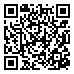

In [11]:
generate_qr_code_base64("https://open.spotify.com/track/3n3Ppam7vgaVa1iaRUc9Lp")